# Homework 1 (100 points)

The goal of this homework is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops

look through the pandas documentation for alternatives.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv('titanic/train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [3]:
def num_nans(df):
    null_rows = sum([True for idx,row in df.iterrows() if any(row.isnull())])
    return null_rows

print("There are " +  str(num_nans(df)) + " rows with at least one empty value")

There are 708 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [4]:
def drop_na(df):
    cols_dropped = []

    for (columnName, columnData) in df.iteritems():
        if sum(columnData.isnull()) > 200:
            cols_dropped.append(columnName)
    df_dropped = df.drop(columns = cols_dropped)
    return df_dropped

df = drop_na(df) 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [5]:
def to_numerical(df):
    df['Sex'].replace(['female','male'],[1,0],inplace=True)
    return df['Sex']

df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [21]:
def extract_names(df):
    names = df['Name'].to_list()
    
    
    first_name = []
    middle_name = []
    last_name = []
    title = []

    for name in names:
        last_name.append(name.split(',')[0])
        title.append(name.split(',')[1].split('.')[0][1:])
        leftover_name = name.split(',')[1].split('.')[1].split(' ')
        first_name.append(leftover_name[1])
        if len(leftover_name) >= 3:
            middle_name.append(leftover_name[2])
        else:
            middle_name.append('')
        
    new_df = pd.DataFrame()
    new_df['first_name'] = pd.Series(first_name)
    new_df['middle_name'] = pd.Series(middle_name)
    new_df['last_name'] = pd.Series(last_name)
    new_df['title'] = pd.Series(title)
    return new_df # your code here

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
extract_names(df)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,Q,James,,Moran,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,S,Timothy,J,McCarthy,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,S,Gosta,Leonard,Palsson,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,S,Oscar,W,Johnson,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,C,Nicholas,(Adele,Nasser,Mrs


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [6]:
def replace_with_mean(df):
    mean_age = df['Age'].mean()
    df['Age_mean']=df['Age'].fillna(mean_age)
    return df['Age_mean']

df['Age'] = replace_with_mean(df)
df.head(10)
# df['Age'].isna().sum() # to test your code

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title,Age_mean
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S,Owen,,Braund,Mr,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs,35.000000
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S,William,,Allen,Mr,35.000000
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,Q,James,,Moran,Mr,29.699118
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,S,Timothy,,McCarthy,Mr,54.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,S,Gosta,,Palsson,Master,2.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,S,Oscar,W,Johnson,Mrs,27.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,C,Nicholas,(Adele,Nasser,Mrs,14.000000


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

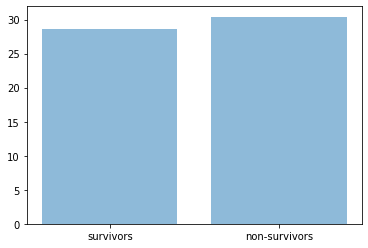

In [7]:
# df of survivors
survivors = df[df.Survived==True]
survivors_mean_age = survivors['Age'].mean()
# df of non-survivors
non_survivors = df[df.Survived==False]
non_survivors_mean_age = non_survivors['Age'].mean()

labels = ['survivors', 'non-survivors']
plt.bar(labels, [survivors_mean_age, non_survivors_mean_age], alpha = 0.5);

There is not much difference in the mean age of the survivors (28) versus the non-survivors (30). 

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

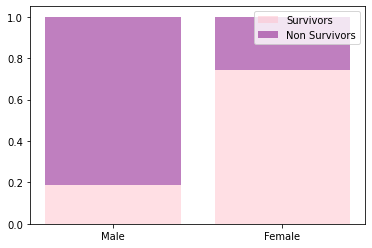

In [9]:
male_survivors = survivors['Sex'].value_counts()[0]
female_survivors = survivors['Sex'].value_counts()[1]

male_non_survivors = non_survivors['Sex'].value_counts()[0]
female_non_survivors = non_survivors['Sex'].value_counts()[1]

labels = ['Male', 'Female']

plt.bar(labels, [male_survivors/(male_survivors+male_non_survivors), female_survivors/(female_survivors+female_non_survivors)], color = 'pink', label='Survivors', alpha=0.5)
plt.bar(labels, [male_non_survivors/(male_survivors+male_non_survivors), female_non_survivors/(female_survivors+female_non_survivors)], bottom = [male_survivors/(male_survivors+male_non_survivors), female_survivors/(female_survivors+female_non_survivors)], color = 'purple', label='Non Survivors', alpha=0.5)
plt.legend(loc='upper right');

This is a bar chart that represents the proportion of males and females that survived when we consider the survivors and non-survivors for each gender. A higher proportion of women survived when compared to men. 

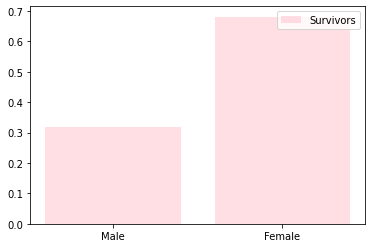

In [10]:
labels = ['Male', 'Female']

plt.bar(labels, [male_survivors/(male_survivors+female_survivors), female_survivors/(female_survivors+male_survivors)], color = 'pink', label='Survivors', alpha=0.5)
# plt.bar(labels, [female_survivors/(male_survivors+female_survivors), female_non_survivors/(female_survivors+female_non_survivors)], bottom = [male_survivors/(male_survivors+male_non_survivors), female_survivors/(female_survivors+female_non_survivors)], color = 'purple', label='Non Survivors', alpha=0.5)
plt.legend(loc='upper right');

This is a bar chart that represents the proportion of males and females that survived when we only consider the survivors. We can see a higher proportion of females survived than males. 

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

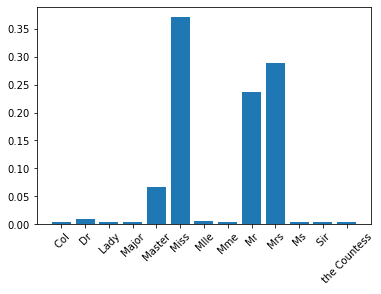

In [11]:
title_group = survivors.groupby('Title')
title = []
labels = []
for item in title_group:
    labels.append(item[0])
    title.append(len(item[1])/len(survivors))
    
plt.bar(labels, title)
plt.xticks(np.arange(len(title_group)), labels, rotation = 45);

This bar chart represents the proportion of different titles that survived over the total number of survivors. There was no comparison between non-survivors performed because titles like Johnkeer exist that don't survive. There isn't a perfect overlap of all titles that survived and those that didn't survive. The highest proportion that survived is "Miss". 

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

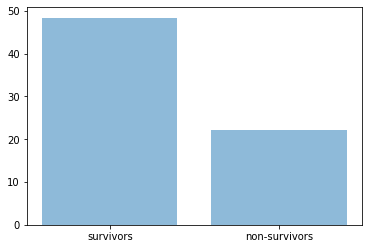

In [12]:
survivors = df[df.Survived==True]
survivors_mean_fare = survivors['Fare'].mean()
non_survivors = df[df.Survived==False]
non_survivors_mean_fare = non_survivors['Fare'].mean()

labels = ['survivors', 'non-survivors']
plt.bar(labels, [survivors_mean_fare, non_survivors_mean_fare], alpha = 0.5);

The survivors had a higher average fare than compared to the non-survivors. It might be possible that a lot of the survivors were rich and could afford a higher priced ticket and the crew decided to also give them lifeboats. 

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

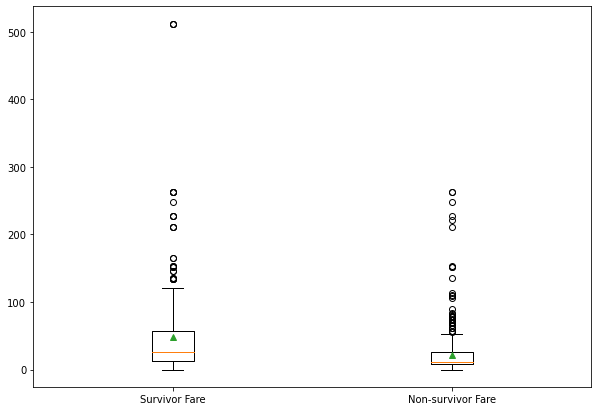

In [24]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
data = [survivors['Fare'], non_survivors['Fare']]
bp = ax.boxplot(data, showmeans=True)
plt.xticks([1,2], ['Survivor Fare', 'Non-survivor Fare']);

In [27]:
#to get the average fare of the boxlpots constructed (represented by the green triangle)
means = [item.get_ydata()[0] for item in bp['means']]
print('Average fare of survivors:', means[0])
print('Average fare of non-survivors:', means[1])

Average fare of survivors: 48.39540760233918
Average fare of non-survivors: 22.117886885245902


The mean of survivor fare is larger than non-survivor fare. The thrid quartile of survivors is also higher than that of non-survivors. 

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [28]:
def zscore(df):
    mean = df['Fare'].mean()
    stddev = df['Fare'].std()
    zscore = pd.DataFrame()
    zscore = abs(df['Fare'] - mean)/stddev
    return zscore
    
df['zscore Fare'] = zscore(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title,Age_mean,zscore Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,,Braund,Mr,22.0,0.502163
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs,38.0,0.786404
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss,26.0,0.488580
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs,35.0,0.420494
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,,Allen,Mr,35.0,0.486064


l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [29]:
df_non_numeric = df._get_numeric_data()
df_non_numeric

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_mean,zscore Fare
0,1,0,3,0,22.000000,1,0,7.2500,22.000000,0.502163
1,2,1,1,1,38.000000,1,0,71.2833,38.000000,0.786404
2,3,1,3,1,26.000000,0,0,7.9250,26.000000,0.488580
3,4,1,1,1,35.000000,1,0,53.1000,35.000000,0.420494
4,5,0,3,0,35.000000,0,0,8.0500,35.000000,0.486064
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,27.000000,0.386454
887,888,1,1,1,19.000000,0,0,30.0000,19.000000,0.044356
888,889,0,3,1,29.699118,1,2,23.4500,29.699118,0.176164
889,890,1,1,0,26.000000,0,0,30.0000,26.000000,0.044356


m) Ignoring passenger ID, write a function that returns the names of the N most similar pairs of passengers using the euclidean distance? - (15 points)  

In [30]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

# need to drop passenger ID 

df_non_numeric_noID = df_non_numeric.drop(columns = 'PassengerId')
    
def getID(passenger):
    return df['Name'].iloc[passenger]    # get the Name of the passenger using the index
    
    
def N_most_similar(df_non_numeric_noID, N):
    res = pdist(df_non_numeric_noID, 'euclidean') #calculating the euclidean distance between 2 passengers
    square = squareform(res) #creates a square matrix
    il1 = np.tril_indices(len(square))
    square[il1] = np.nan #converting one half of a triangle to Nan to avoid dupliactes
    minvalue = np.nanmin(square) #finding minimum value
    result = np.where(square == minvalue) #obtaining coordinates of minimum value
    # zip the 2 arrays to get the exact coordinates
    listOfCordinates = list(zip(result[0], result[1]))
    
    str_res = ''
    if len(listOfCordinates) >= N: 
        for i in range(N):
            str_res+='Passenger pair {}: \n'.format(i+1)
            for j in listOfCordinates[i]:
                str_res+=getID(j) + '\n'
    return str_res


print("The 3 most similar pairs of passengers are: \n" + str(N_most_similar(df_non_numeric_noID, 3)))

The 3 most similar pairs of passengers are: 
Passenger pair 1: 
Allen, Mr. William Henry
Brocklebank, Mr. William Alfred
Passenger pair 2: 
Emir, Mr. Farred Chehab
Yousif, Mr. Wazli
Passenger pair 3: 
Emir, Mr. Farred Chehab
Lahoud, Mr. Sarkis



## Exercise 2 - (40 points)

Another way to get data is by using APIs. Here we will be using the google books API (https://developers.google.com/books/docs/overview)

a) Create a list with these topic strings: Python; Data Science; Data Analysis; Machine Learning; and Deep 
Learning. Use these topics, one at a time, to query the Google Books API by modifying the code below. - (5 points)

In [1]:
import requests
import json
import pandas as pd

"""
    Google Books Api
    See: https://developers.google.com/books/
"""

def get(topic=""):
    BASEURL = 'https://www.googleapis.com/books/v1/volumes'
    headers = {'Content-Type': 'application/json'}

    response = requests.get(BASEURL + "?q=" + topic, headers=headers)

    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))

    return response

python = get("Python")
data_science = get("Data Science")
data_analytics = get("Data Analysis")
machine_learning = get("Machine Learning")
deep_learning = get("Deep Learning")


b) For each returned JSON string: Convert the JSON string to a dict using `loads( )` then use this to convert it to a DataFrame: `pd.json_normalize( thedict['items'] )`. Then save them as `.csv`. - (5 points)

In [2]:
# since it has already been converted to dict in the previous block, will not do it again
python_df = pd.json_normalize(python['items'])
python_df.to_csv('output/python.csv')

data_science_df = pd.json_normalize(data_science['items'])
data_science_df.to_csv('output/data_science.csv')

data_analytics_df = pd.json_normalize(data_analytics['items'])
data_analytics_df.to_csv('output/data_analytics.csv')

machine_learning_df = pd.json_normalize(machine_learning['items'])
machine_learning_df.to_csv('output/machine_learning.csv')

deep_learning_df = pd.json_normalize(deep_learning['items'])
deep_learning_df.to_csv('output/deep_learning.csv')

c) For each DataFrame, relabel `volumeInfo.title` as `Title` and `volumeInfo.authors` as `Authors`. - (5 points)

In [4]:
python_df = python_df.rename(columns={"volumeInfo.title": "Title", "volumeInfo.authors": "Authors"})
data_science_df = data_science_df.rename(columns={"volumeInfo.title": "Title", "volumeInfo.authors": "Authors"})
data_analytics_df = data_analytics_df.rename(columns={"volumeInfo.title": "Title", "volumeInfo.authors": "Authors"})
machine_learning_df = machine_learning_df.rename(columns={"volumeInfo.title": "Title", "volumeInfo.authors": "Authors"})
deep_learning_df = deep_learning_df.rename(columns={"volumeInfo.title": "Title", "volumeInfo.authors": "Authors"})

d) For each DataFrame create a new column called `Topic` with the name of the topic from the API query above. Then merge all DataFrames into one and save it to a new `.csv` file. - (10 points)

In [5]:
python_df['Topic'] = "Python"
data_science_df['Topic'] = "Data Science"
data_analytics_df['Topic'] = "Data Analytics"
machine_learning_df['Topic'] = "Machine Learning"
deep_learning_df['Topic'] = "Deep Learning"

concatenated_df = pd.concat([python_df, data_science_df, data_analytics_df, machine_learning_df, deep_learning_df], axis=0, ignore_index=True)
concatenated_df.to_csv('output/Complete_file.csv')

e) Write a function that returns all rows whose `Title` contains the word `Data` (case incensitive). - (5 points)

In [6]:
def data_return(df, word):
    return df[df["Title"].str.contains(word, case=False)]
    
    
df_special_words = data_return(concatenated_df, 'Data')    
df_special_words

,kind,id,etag,selfLink,Title,volumeInfo.subtitle,Authors,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,volumeInfo.categories,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,Topic,accessInfo.epub.acsTokenLink,accessInfo.pdf.acsTokenLink
10,books#volume,vfi3DQAAQBAJ,YALaMQ7FPPU,https://www.googleapis.com/books/v1/volumes/vf...,R for Data Science,"Import, Tidy, Transform, Visualize, and Model ...","[Hadley Wickham, Garrett Grolemund]",2016-12-12,"""This book introduces you to R, RStudio, and t...","[{'type': 'ISBN_13', 'identifier': '9781491910...",...,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,Data Science,NaN,NaN
11,books#volume,TFpVDwAAQBAJ,uYVF4QsXB0w,https://www.googleapis.com/books/v1/volumes/TF...,Data Science,NaN,"[John D. Kelleher, Brendan Tierney]",2018-04-13,A concise introduction to the emerging field o...,"[{'type': 'ISBN_13', 'identifier': '9780262535...",...,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,Data Science,NaN,NaN
12,books#volume,xb29DwAAQBAJ,e8OUyMP0zIc,https://www.googleapis.com/books/v1/volumes/xb...,Introduction to Data Science,Data Analysis and Prediction Algorithms with R,[Rafael A. Irizarry],2019-11-20,Introduction to Data Science: Data Analysis an...,"[{'type': 'ISBN_13', 'identifier': '9781000708...",...,[Mathematics],NaN,NaN,NaN,NaN,NaN,NaN,Data Science,http://books.google.com/books/download/Introdu...,http://books.google.com/books/download/Introdu...
13,books#volume,6omNDQAAQBAJ,o19U+AceSO4,https://www.googleapis.com/books/v1/volumes/6o...,Python Data Science Handbook,Essential Tools for Working with Data,[Jake VanderPlas],2016-11-21,"For many researchers, Python is a first-class ...","[{'type': 'ISBN_13', 'identifier': '9781491912...",...,[Computers],59.99,USD,59.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",Data Science,NaN,NaN
14,books#volume,vcVKAQAAQBAJ,NzsQ+61kSkk,https://www.googleapis.com/books/v1/volumes/vc...,Doing Data Science,Straight Talk from the Frontline,"[Cathy O'Neil, Rachel Schutt]",2013-10-09,Now that people are aware that data can make t...,"[{'type': 'ISBN_13', 'identifier': '9781449363...",...,[Computers],46.99,USD,46.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",Data Science,NaN,NaN
15,books#volume,UG76DwAAQBAJ,pX43X/r8ZVw,https://www.googleapis.com/books/v1/volumes/UG...,Data Science in Education Using R,NaN,"[Ryan A. Estrellado, Emily A. Freer, Jesse Mos...",2020-10-26,Data Science in Education Using R is the go-to...,"[{'type': 'ISBN_13', 'identifier': '9781000200...",...,[Education],48.95,USD,37.69,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",Data Science,http://books.google.com/books/download/Data_Sc...,http://books.google.com/books/download/Data_Sc...
16,books#volume,4ZctAAAAQBAJ,cc/KqcIfPIg,https://www.googleapis.com/books/v1/volumes/4Z...,Data Science for Business,What You Need to Know about Data Mining and Da...,"[Foster Provost, Tom Fawcett]",2013-07-27,Written by renowned data science experts Foste...,"[{'type': 'ISBN_13', 'identifier': '9781449374...",...,[Computers],33.99,USD,33.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",Data Science,NaN,NaN
17,books#volume,JYodCAAAQBAJ,yqbuyQ3glzY,https://www.googleapis.com/books/v1/volumes/JY...,Data Science from Scratch,First Principles with Python,[Joel Grus],2015-04-14,"Data science libraries, frameworks, modules, a...","[{'type': 'ISBN_13', 'identifier': '9781491904...",...,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,Data Science,NaN,NaN
18,books#volume,xDszEAAAQBAJ,Mne/Ke/ah7Q,https://www.googleapis.com/books/v1/volumes/xD...,Build a Career in Data Science,NaN,"[Emily Robinson, Jacqueline Nolis]",2020-03-06,Summary You are going to need more than techni..

f) Write a function that returns all rows whose `Authors` first or last name starts with the letter `E` - (10 points)

In [7]:
def special_name(df, letter):
    new_df = pd.DataFrame() # stores the rows that will be returned at the end
    for idx, row in df.iterrows():
        for author in row['Authors']: # going through the list of author(s) in every row
            first_name = author.split(' ')[0]
            last_name = author.split(' ')[-1]
            if first_name.startswith('E') or last_name.startswith('E'):
                new_df = new_df.append(row)
            
    return new_df

df_special_authornames = special_name(concatenated_df, 'E')
df_special_authornames.to_csv('special_authors_E.csv')
df_special_authornames

,kind,id,etag,selfLink,Title,volumeInfo.subtitle,Authors,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,volumeInfo.categories,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,Topic,accessInfo.epub.acsTokenLink,accessInfo.pdf.acsTokenLink
15,books#volume,UG76DwAAQBAJ,pX43X/r8ZVw,https://www.googleapis.com/books/v1/volumes/UG...,Data Science in Education Using R,NaN,"[Ryan A. Estrellado, Emily A. Freer, Jesse Mos...",2020-10-26,Data Science in Education Using R is the go-to...,"[{'type': 'ISBN_13', 'identifier': '9781000200...",...,[Education],48.95,USD,37.69,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",Data Science,http://books.google.com/books/download/Data_Sc...,http://books.google.com/books/download/Data_Sc...
15,books#volume,UG76DwAAQBAJ,pX43X/r8ZVw,https://www.googleapis.com/books/v1/volumes/UG...,Data Science in Education Using R,NaN,"[Ryan A. Estrellado, Emily A. Freer, Jesse Mos...",2020-10-26,Data Science in Education Using R is the go-to...,"[{'type': 'ISBN_13', 'identifier': '9781000200...",...,[Education],48.95,USD,37.69,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",Data Science,http://books.google.com/books/download/Data_Sc...,http://books.google.com/books/download/Data_Sc...
18,books#volume,xDszEAAAQBAJ,Mne/Ke/ah7Q,https://www.googleapis.com/books/v1/volumes/xD...,Build a Career in Data Science,NaN,"[Emily Robinson, Jacqueline Nolis]",2020-03-06,Summary You are going to need more than techni...,"[{'type': 'ISBN_13', 'identifier': '9781638350...",...,[Computers],28.99,USD,28.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",Data Science,http://books.google.com/books/download/Build_a...,NaN
33,books#volume,AGQ4DQAAQBAJ,R10LP7D7oZg,https://www.googleapis.com/books/v1/volumes/AG...,Machine Learning,The New AI,[Ethem Alpaydin],2016-10-07,A concise overview of machine learning—compute...,"[{'type': 'ISBN_13', 'identifier': '9780262529...",...,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,Machine Learning,NaN,NaN
44,books#volume,LrT4DwAAQBAJ,bJJ2WEr+B64,https://www.googleapis.com/books/v1/volumes/Lr...,Introduction to Deep Learning,NaN,[Eugene Charniak],2019-01-29,A project-based guide to the basics of deep le...,"[{'type': 'ISBN_13', 'identifier': '9780262039...",...,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,Deep Learning,NaN,NaN
